# Basic Information
* title: "Deduplication of contact information"
* author: "Kent Shih"
* date: "14 10, 2019"

# Data Description

* address_matching_data.csv is training data that have been transformed by feature engineering
* they use different feature engineering technic to transform orginal data to continue value such as "name_trigram_term"
* the "name_trigram_term" is intersection percentage between origin record in database and new entry that user want to insert and check
* trigram_term is https://en.wikipedia.org/wiki/Trigram

# Data exploration
* Some missing value 
* ??_equality is same as ??, so we remove those columns
* the number of postive data and negatvie data are both balance
* the values of columns have been standarization ? 
* the number of data is sufficent to build a hight complexity model such as deep learning


In [14]:
EVA_SIZE = 2500

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# read from row data and do suffle 
data_df = pd.read_csv("./address_matching_data.csv").sample(frac=1,random_state=1)
data_df[-10:]

,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality,is_match
20609,2465#2478,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.454545,0.5,1,...,?,?,?,?,1.0,1.0,m,m,s,1
144,702#703,0.545455,0.545455,0.377778,0.409091,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
21440,2097#2064,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,1.0,1.0,?,?,0.75,0.428571432829,s,m,n,1
19279,8258#8263,0.080808,0.011111,0.088235,0.021739,?,?,?,?,?,...,?,?,?,?,?,?,m,m,n,-1
7813,6549#6550,0.222857,0.000000,0.153846,0.000000,1,1,1,1,?,...,1.0,1.0,?,?,?,?,s,m,n,1
10955,2177#2183,1.000000,1.000000,1.000000,1.000000,1,1,1,1,?,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
17289,2260#2257,0.977273,0.910714,0.954545,0.800000,?,?,?,?,?,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
5192,1177#1184,0.693452,0.566667,0.695652,0.592593,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
12172,137#138,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,1.0,1.0,?,?,0.5,0.285714298487,s,m,n,1
235,8175#8181,0.183838,0.033333,0.117647,0.030303,?,?,?,?,?,...,?,?,?,?,0.5,0.25,m,m,n,-1


In [17]:
test_df = pd.read_csv("./address_matching_test.csv")
test_df.head()

,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,website_trigram_term,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality
0,7221#7218,0.703704,0.666667,0.680000,0.533333,1,1,1,1,1,...,?,1.0,1.0,?,?,1.0,1.0,s,m,s
1,2393#2398,1.000000,1.000000,0.520000,1.000000,0.666667,0.666667,0.454545,0.5,1,...,?,?,?,?,?,1.0,1.0,m,m,s
2,2509#2510,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,?,1.0,1.0,?,?,?,?,s,m,n
3,3695#3700,0.111310,0.000000,0.095238,0.000000,1,1,1,1,0.8,...,?,?,?,?,?,?,?,m,m,n
4,15918#15955,0.175000,0.074074,0.153846,0.095238,1,1,1,1,1,...,?,?,?,?,?,?,?,m,m,n


In [18]:
# over half of dataset have missing value
data_df.describe()

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,is_match
count,28235.000000,28235.000000,28235.000000,28235.000000,28235.00000
mean,0.628171,0.563277,0.537006,0.509530,0.43524
std,0.304767,0.369004,0.324820,0.372265,0.90033
min,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,0.363387,0.222222,0.243243,0.142857,-1.00000
50%,0.666667,0.666667,0.476190,0.483871,1.00000
75%,1.000000,1.000000,0.875000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


In [19]:
# miss value rate
for c in data_df.columns:
    print(c,str(sum(data_df[c]=='?')/28235)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.64
city_trigram_simple 0.64
city_levenshtein_term 0.64
city_trigram_term 0.64
zip_levenshtein_simple 0.72
zip_trigram_simple 0.72
zip_levenshtein_term 0.72
zip_trigram_term 0.72
street_levenshtein_simple 0.70
street_trigram_simple 0.70
street_levenshtein_term 0.70
street_trigram_term 0.70
website_levenshtein_simple 0.93
website_trigram_simple 0.93
website_levenshtein_term 0.93
website_trigram_term 0.93
phone_levenshtein 0.57
phone_trigram 0.57
fax_levenshtein 0.97
fax_trigram 0.97
street_number_levenshtein 0.34
street_number_trigram 0.34
phone_equality 0.0
fax_equality 0.0
street_number_equality 0.0
is_match 0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [20]:
# remove duplicate column 
for c in data_df.columns:
    if 'equality' in c : 
        print("del",c)
        del data_df[c]

del phone_equality
del fax_equality
del street_number_equality


In [21]:
new_data_df = data_df.replace("?",-1)

for c in new_data_df.columns:
    print(c,str(sum(new_data_df[c]=='?')/28235)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.0
city_trigram_simple 0.0
city_levenshtein_term 0.0
city_trigram_term 0.0
zip_levenshtein_simple 0.0
zip_trigram_simple 0.0
zip_levenshtein_term 0.0
zip_trigram_term 0.0
street_levenshtein_simple 0.0
street_trigram_simple 0.0
street_levenshtein_term 0.0
street_trigram_term 0.0
website_levenshtein_simple 0.0
website_trigram_simple 0.0
website_levenshtein_term 0.0
website_trigram_term 0.0
phone_levenshtein 0.0
phone_trigram 0.0
fax_levenshtein 0.0
fax_trigram 0.0
street_number_levenshtein 0.0
street_number_trigram 0.0
is_match 0.0


# Modeling approach
* becasue we have a lot of labeled data so we could try to use a heavy model , such as deep learning
* but overfitting issue , we just use 3 layer and add dropout layer between each hidden layer
* the performnace is prety good

In [22]:

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
# from keras.metrics import categorical_crossentropy
from keras.losses import categorical_crossentropy

Using TensorFlow backend.


In [23]:
id_list = new_data_df['id'].tolist()
del new_data_df['id']
match_list = new_data_df['is_match'].tolist()
del new_data_df['is_match']


In [24]:
new_match_list = []
for v in  match_list:
    if v == 1 : new_match_list.append(1)
    else: new_match_list.append(0)

In [25]:
raw_data = new_data_df.to_numpy()

In [26]:
raw_data.shape

(28235, 26)

In [27]:
simple_model = Sequential([
    Dense(raw_data.shape[1], input_shape=(raw_data.shape[1], )),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='softmax')
])

In [28]:
simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 26)                702       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                864       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,632
Trainable params: 1,632
Non-trainable params: 0
_________________________________________________________________


In [29]:
simple_model.compile(Adam(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

In [30]:
y_train=keras.utils.to_categorical(new_match_list[:-EVA_SIZE])


In [31]:
X_train = raw_data[:-EVA_SIZE]

In [32]:
simple_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=10, shuffle=True, verbose=2)

Train on 20588 samples, validate on 5147 samples
Epoch 1/10
 - 1s - loss: 0.3252 - accuracy: 0.8607 - val_loss: 0.2542 - val_accuracy: 0.8877
Epoch 2/10
 - 1s - loss: 0.2555 - accuracy: 0.8947 - val_loss: 0.2188 - val_accuracy: 0.8996
Epoch 3/10
 - 1s - loss: 0.2321 - accuracy: 0.9039 - val_loss: 0.2013 - val_accuracy: 0.9170
Epoch 4/10
 - 1s - loss: 0.2173 - accuracy: 0.9124 - val_loss: 0.1867 - val_accuracy: 0.9201
Epoch 5/10
 - 1s - loss: 0.2128 - accuracy: 0.9133 - val_loss: 0.1822 - val_accuracy: 0.9233
Epoch 6/10
 - 1s - loss: 0.2026 - accuracy: 0.9193 - val_loss: 0.1741 - val_accuracy: 0.9254
Epoch 7/10
 - 1s - loss: 0.1961 - accuracy: 0.9215 - val_loss: 0.1759 - val_accuracy: 0.9236
Epoch 8/10
 - 1s - loss: 0.1945 - accuracy: 0.9220 - val_loss: 0.1710 - val_accuracy: 0.9295
Epoch 9/10
 - 1s - loss: 0.1904 - accuracy: 0.9259 - val_loss: 0.1694 - val_accuracy: 0.9318
Epoch 10/10
 - 1s - loss: 0.1910 - accuracy: 0.9240 - val_loss: 0.1651 - val_accuracy: 0.9337


# Performance analysis
* roc_auc is 0.977
* use "grid search" to find the optimization threshhold
* the best threshold is 0.53


In [33]:
X_eva = raw_data[-EVA_SIZE:]
y_eva=keras.utils.to_categorical(new_match_list[-EVA_SIZE:])


In [34]:
simple_model.evaluate(    
    x=X_eva,
    y=y_eva,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,)

2500/2500 [==============================] - 0s 16us/step


[0.1654534246623516, 0.9340000152587891]

In [35]:
from sklearn.metrics import precision_score,f1_score

In [36]:
result_prb = simple_model.predict(X_eva)
predict_classes = simple_model.predict_classes(x=X_eva)

In [37]:
precision_score(new_match_list[-EVA_SIZE:],predict_classes)

0.9424731182795699

In [38]:
f1_score(new_match_list[-EVA_SIZE:],predict_classes)

0.9550531190411333

# Custom Score
* score = (True_Positive + True_Negative * 2)/3


In [61]:
def TPR(x,y):
    total = sum([v==1 for v in x ])
    tp_count = 0
    for i,v in enumerate(y) :
        if v == 1 and x[i] == 1:
            tp_count = tp_count + 1
    return tp_count/total

In [62]:
def TNR(x,y):
    total = sum([v==0 for v in x ])
    tp_count = 0
    for i,v in enumerate(y) :
        if v == 0 and x[i] == 0:
            tp_count = tp_count + 1
    return tp_count/total

In [63]:
def PRE(x,y):
    total = len(x)
    tp_count = 0
    for i,v in enumerate(y) :
        if v == x[i]:
            tp_count = tp_count + 1
    return tp_count/total

In [64]:
print("PRE",PRE(new_match_list[-EVA_SIZE:],predict_classes))
print("TPR",TPR(new_match_list[-EVA_SIZE:],predict_classes))
print("TNR",TNR(new_match_list[-EVA_SIZE:],predict_classes))

PRE 0.934
TPR 0.9679734953064605
TNR 0.8447024673439768


In [65]:
# Use Grid Search
max_score = -1
score_list = []
for th in np.arange(0.01,1,0.01):
    predict_classes_with_th  = (result_prb[:,1]>th).astype('int')
    print("positive",predict_classes_with_th.sum())
    score = (TPR(
        new_match_list[-EVA_SIZE:],predict_classes_with_th) + TNR(
        new_match_list[-EVA_SIZE:],predict_classes_with_th)*2)/3

    print("Score:",score, 
          "TPR:",TPR(new_match_list[-EVA_SIZE:],predict_classes_with_th),
          "TNR:",TNR(new_match_list[-EVA_SIZE:],predict_classes_with_th))
    if score >= max_score : 
        max_score = score
    
    else :
        break
        
    score_list.append(score)
best_th = th - 0.01
# So the threshold is ? , for TPR + TNR*3
print("for best threshold is " , th - 0.01)

positive 2459
Score: 0.37300435413642963 TPR: 1.0 TNR: 0.059506531204644414
positive 2393
Score: 0.43571337552563394 TPR: 0.9994478188845941 TNR: 0.15384615384615385
positive 2331
Score: 0.49455205342185327 TPR: 0.9988956377691883 TNR: 0.24238026124818576
positive 2274
Score: 0.5497044481968896 TPR: 0.9988956377691883 TNR: 0.3251088534107402
positive 2219
Score: 0.6017700249803851 TPR: 0.9983434566537824 TNR: 0.4034833091436865
positive 2163
Score: 0.6536515413920788 TPR: 0.9972390944229708 TNR: 0.4818577648766328
positive 2116
Score: 0.6945214924544597 TPR: 0.9950303699613473 TNR: 0.5442670537010159
positive 2093
Score: 0.7156243212940753 TPR: 0.9944781888459415 TNR: 0.5761973875181422
positive 2080
Score: 0.7282029376462766 TPR: 0.9944781888459415 TNR: 0.5950653120464441
positive 2067
Score: 0.7396299077534296 TPR: 0.9939260077305356 TNR: 0.6124818577648766
positive 2058
Score: 0.7471865343675977 TPR: 0.9933738266151297 TNR: 0.6240928882438317
positive 2043
Score: 0.7605486762212433 

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score
## ROC Cuve , I think the normal case , usually is "F1Score"
fpr, tpr, thresholds = roc_curve(new_match_list[-EVA_SIZE:], result_prb[:,1])


In [67]:
# and see roc cuve area 

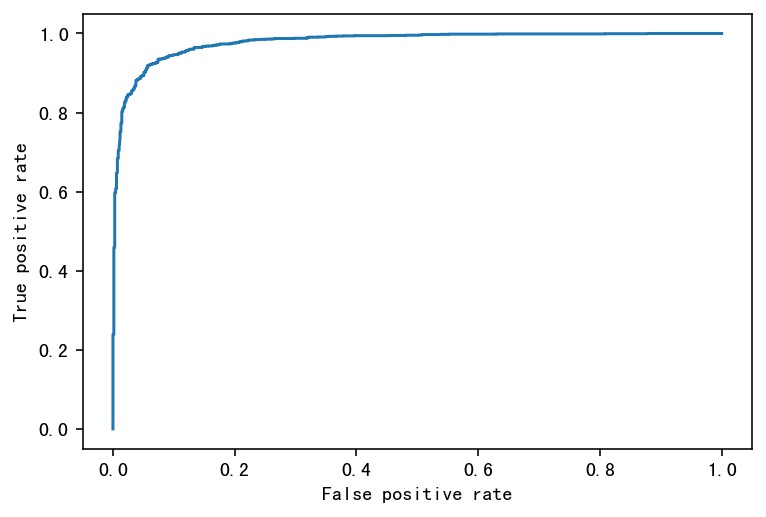

In [68]:
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

## ROC_AUC score is a good metric to measure the peformance

In [69]:
roc_auc_score(new_match_list[-EVA_SIZE:], result_prb[:,1])

0.978860839940406

# DO testing

In [49]:
test_df = pd.read_csv("./address_matching_test.csv")
test_df.describe()

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term
count,6230.000000,6230.000000,6230.000000,6230.000000
mean,0.617670,0.550384,0.521490,0.493838
std,0.309591,0.372656,0.329626,0.375572
min,0.000000,0.000000,0.000000,0.000000
25%,0.342857,0.172577,0.225806,0.120000
50%,0.666667,0.591837,0.448276,0.450806
75%,1.000000,1.000000,0.865116,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [50]:
# miss value rate
for c in test_df.columns:
    print(c,str(sum(test_df[c]=='?')/6230)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.64
city_trigram_simple 0.64
city_levenshtein_term 0.64
city_trigram_term 0.64
zip_levenshtein_simple 0.73
zip_trigram_simple 0.73
zip_levenshtein_term 0.73
zip_trigram_term 0.73
street_levenshtein_simple 0.71
street_trigram_simple 0.71
street_levenshtein_term 0.71
street_trigram_term 0.71
website_levenshtein_simple 0.94
website_trigram_simple 0.94
website_levenshtein_term 0.94
website_trigram_term 0.94
phone_levenshtein 0.59
phone_trigram 0.59
fax_levenshtein 0.97
fax_trigram 0.97
street_number_levenshtein 0.34
street_number_trigram 0.34
phone_equality 0.0
fax_equality 0.0
street_number_equality 0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [51]:
for c in test_df.columns:
    if 'equality' in c : 
        print("del",c)
        del test_df[c]

del phone_equality
del fax_equality
del street_number_equality


In [52]:
new_test_df = test_df.replace("?",-1)
for c in new_test_df.columns:
    print(c,str(sum(new_test_df[c]=='?')/6230)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.0
city_trigram_simple 0.0
city_levenshtein_term 0.0
city_trigram_term 0.0
zip_levenshtein_simple 0.0
zip_trigram_simple 0.0
zip_levenshtein_term 0.0
zip_trigram_term 0.0
street_levenshtein_simple 0.0
street_trigram_simple 0.0
street_levenshtein_term 0.0
street_trigram_term 0.0
website_levenshtein_simple 0.0
website_trigram_simple 0.0
website_levenshtein_term 0.0
website_trigram_term 0.0
phone_levenshtein 0.0
phone_trigram 0.0
fax_levenshtein 0.0
fax_trigram 0.0
street_number_levenshtein 0.0
street_number_trigram 0.0


In [53]:
# keep id list and remove it from test_df
id_test_list = new_test_df['id'].tolist()
del new_test_df['id']

In [54]:
raw_test_data = new_test_df.to_numpy()
X_test = raw_test_data

In [55]:
# use model to predict the testing data
test_result = simple_model.predict(X_test)

In [56]:
resut_df =  pd.DataFrame(test_result)

In [57]:
resut_df.describe()

,0,1
count,6230.000000,6230.000000
mean,0.298199,0.701801
std,0.396340,0.396340
min,0.000002,0.003429
25%,0.001850,0.281697
50%,0.033583,0.966417
75%,0.718303,0.998150
max,0.996571,0.999998


In [58]:
# testing data , predict result is as below
answer = list( zip(id_test_list,(test_result[:,1]>best_th).astype(int).tolist()))

In [59]:
pd.DataFrame(answer).describe()

,1
count,6230.000000
mean,0.738363
std,0.439561
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# Potential improvements
* ensemble methodology
* becasue fale positive rate is also import to operater. so in real case and production env , we need to build a doubel check mechanism
* strong rule, such as decision tree . this algorithm could produce the human readable result and rule that help our user to understnad the system behavior.


# Conclusion 
* this is a very good challenge to test a data scientist.
* i just build only one model , but i think is so far so good as baseline model.
